In [1]:
%pylab inline
from time import time

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Numpy vs. Native Python

This notebook demonstrates the large difference in speed between native python code and numpy.

We start with a very simple task of taking the product of two square matrices. In numpy this done using the function `.dot()`

In [2]:
n=100
A=ones([n,n])
B=copy(A)
C=copy(A)

In [4]:
%%time
C=A.dot(B)

CPU times: user 22.4 ms, sys: 1.45 ms, total: 23.9 ms
Wall time: 13.2 ms


### matrix product in native python

To perform the same operation in python we need a three level nested loop. Instead of 1ms, the operation takes 500ms

In [4]:
%%time
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        s=0
        for k in range(A.shape[1]):
            s+=A[i,k]*B[k,j]
        C[i,j]=s  
t2=time()

CPU times: user 746 ms, sys: 65.5 ms, total: 812 ms
Wall time: 519 ms


In [5]:
def test_mat_prod_numpy(n=100):
    A=ones([n,n])
    B=copy(A)
    t0=time()
    C=A.dot(B)
    t1=time()
    return t1-t0

def test_mat_prod_python(n=100):
    A=ones([n,n])
    B=copy(A)
    C=copy(A)

    t1=time()
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            s=0
            for k in range(A.shape[1]):
                s+=A[i,k]*B[k,j]
            C[i,j]=s  
    t2=time()
    return t2-t1

In [6]:
repeats=10
tn=[[] for i in range(repeats)]
tp=[]
sizes=list(range(1,10))+list(range(10,100,10))+[200,300]
for n in sizes:
    print('\r',n,end='')
    for i in range(repeats):
        tn[i].append(test_mat_prod_numpy(n))
    tp.append(test_mat_prod_python(n))


 300

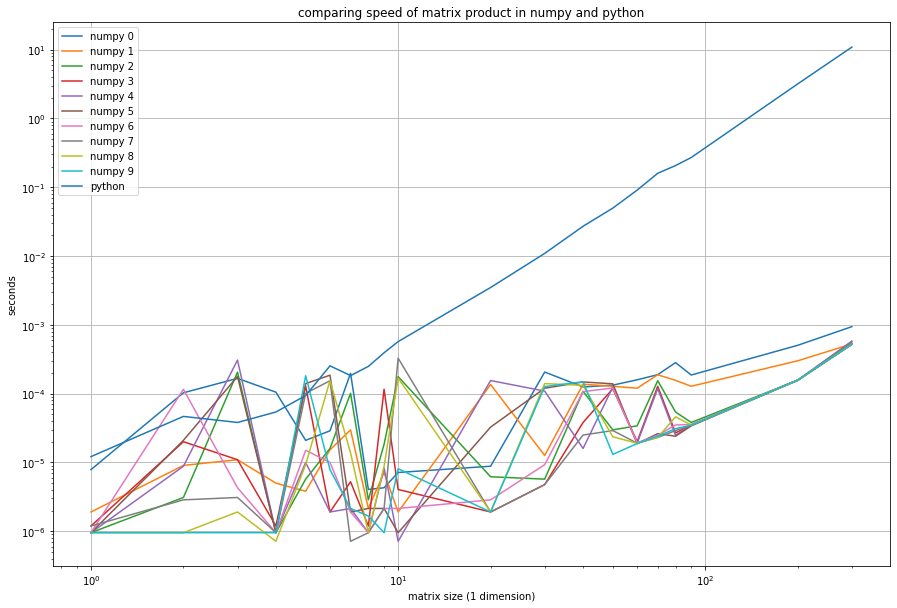

In [7]:
figure(figsize=[15,10])
for i in range(repeats):
    loglog(sizes,tn[i],label='numpy %d'%i);

loglog(sizes,tp,label='python');
xlabel('matrix size (1 dimension)')
ylabel('seconds')
title('comparing speed of matrix product in numpy and python')
legend()
grid()

**Observe**  
* For matrix sizes up to $10\times10$ there is no significant advantage to numpy over native python
* For matrix size of $300\times 300$ numpy is about 10,000 times faster than native python
* For sizes up to $10\times10$ the running time of numpy fluctuates between $10^{-4}$ and $10^{-6}$ of a second.
* As the size increases from $10\times10$ to $300\times 300$ the relative fluctuations decreases.

### Inverting a matrix

In [25]:
a = np.random.normal(size=[1000,1000])
a.shape

(1000, 1000)

In [26]:
%%time
ainv = np.linalg.inv(a) 

CPU times: user 199 ms, sys: 12.5 ms, total: 212 ms
Wall time: 67.9 ms


### Lets check that ainv is really the inverse of a
The dot product should give us the unit matrix.

In [34]:
C=ainv.dot(a)
C

array([[ 1.00000000e+00, -1.30562228e-13, -7.07212067e-14, ...,
        -1.16129328e-13,  2.65787392e-13,  6.62525590e-14],
       [-1.72750703e-13,  1.00000000e+00,  2.75446332e-13, ...,
         9.90318938e-14,  4.99600361e-14,  1.32116540e-13],
       [ 1.41220369e-13, -3.99680289e-14,  1.00000000e+00, ...,
        -1.33004718e-13,  1.80522264e-13, -3.07365244e-13],
       ...,
       [ 2.33146835e-15, -7.54951657e-15,  2.32452946e-15, ...,
         1.00000000e+00,  9.36750677e-15, -1.14491749e-15],
       [-6.75015599e-14,  1.04805054e-13,  3.33066907e-15, ...,
         1.05249143e-13,  1.00000000e+00,  4.91828800e-14],
       [ 3.01980663e-14, -4.70734562e-14, -5.99520433e-15, ...,
        -5.50670620e-14,  1.32116540e-14,  1.00000000e+00]])

In [35]:
C[C<0.001]=0
C

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Linear regression

In [30]:
A = np.array([[1, 2, 1],
              [1,1,2],
              [2,1,1],
              [1,1,1]])
b = np.array([[4,3,5,4],[1,2,3,4]]).T # transpose to align dimensions

x, residuals, rank, s = np.linalg.lstsq(A,b,rcond=None)

print(x) # columns of x are solutions corresponding to columns of b
#[[ 2.05263158  1.63157895]
# [ 1.05263158 -0.36842105]
# [ 0.05263158  0.63157895]]
print(residuals) # also one for each column in b
#[ 0.84210526  5.26315789]

### Numpy and memory size
Numpy is very efficient if the dataset fits in memory. Otherwise it becomes very slow.

### Comparing numpy to matlab
Matlab, like numpy, is very fast for matrix arithmetic. The reason is simple: they are both based on 
highly optimized [libraries for linear algebra](https://en.wikipedia.org/wiki/Comparison_of_linear_algebra_libraries).

For example LAPACK, which was release in 1992 and is written in FORTRAN !